# (Ford GoBike System data Exploration )
## by (Malak Alshedokhi)

## Preliminary Wrangling

> This document explores a dataset contains the Ford GoBike's trips for public containing approximately ...

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
# load in the dataset into a pandas dataframe, print statistics
April = pd.read_csv('201904-fordgobike-tripdata.csv')
May = pd.read_csv('201905-baywheels-tripdata.csv')
June = pd.read_csv('201905-baywheels-tripdata.csv')

In [3]:
April.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239111 entries, 0 to 239110
Data columns (total 16 columns):
duration_sec               239111 non-null int64
start_time                 239111 non-null object
end_time                   239111 non-null object
start_station_id           239047 non-null float64
start_station_name         239047 non-null object
start_station_latitude     239111 non-null float64
start_station_longitude    239111 non-null float64
end_station_id             239047 non-null float64
end_station_name           239047 non-null object
end_station_latitude       239111 non-null float64
end_station_longitude      239111 non-null float64
bike_id                    239111 non-null int64
user_type                  239111 non-null object
member_birth_year          227912 non-null float64
member_gender              227912 non-null object
bike_share_for_all_trip    239111 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 29.2+ MB


In [4]:
May.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182163 entries, 0 to 182162
Data columns (total 16 columns):
duration_sec               182163 non-null int64
start_time                 182163 non-null object
end_time                   182163 non-null object
start_station_id           182148 non-null float64
start_station_name         182148 non-null object
start_station_latitude     182163 non-null float64
start_station_longitude    182163 non-null float64
end_station_id             182148 non-null float64
end_station_name           182148 non-null object
end_station_latitude       182163 non-null float64
end_station_longitude      182163 non-null float64
bike_id                    182163 non-null int64
user_type                  182163 non-null object
member_birth_year          173694 non-null float64
member_gender              173697 non-null object
bike_share_for_all_trip    182163 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.2+ MB


In [5]:
June.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182163 entries, 0 to 182162
Data columns (total 16 columns):
duration_sec               182163 non-null int64
start_time                 182163 non-null object
end_time                   182163 non-null object
start_station_id           182148 non-null float64
start_station_name         182148 non-null object
start_station_latitude     182163 non-null float64
start_station_longitude    182163 non-null float64
end_station_id             182148 non-null float64
end_station_name           182148 non-null object
end_station_latitude       182163 non-null float64
end_station_longitude      182163 non-null float64
bike_id                    182163 non-null int64
user_type                  182163 non-null object
member_birth_year          173694 non-null float64
member_gender              173697 non-null object
bike_share_for_all_trip    182163 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.2+ MB


In [6]:
# Need to concatenate all files in one data frame

Three_months_df = pd.concat([April, May, June], sort=True)

In [7]:
Three_months_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 603437 entries, 0 to 182162
Data columns (total 16 columns):
bike_id                    603437 non-null int64
bike_share_for_all_trip    603437 non-null object
duration_sec               603437 non-null int64
end_station_id             603343 non-null float64
end_station_latitude       603437 non-null float64
end_station_longitude      603437 non-null float64
end_station_name           603343 non-null object
end_time                   603437 non-null object
member_birth_year          575300 non-null float64
member_gender              575306 non-null object
start_station_id           603343 non-null float64
start_station_latitude     603437 non-null float64
start_station_longitude    603437 non-null float64
start_station_name         603343 non-null object
start_time                 603437 non-null object
user_type                  603437 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 78.3+ MB


In [8]:
# high-level overview of data shape and composition
print(Three_months_df.shape)
print(Three_months_df.dtypes)
print(Three_months_df.head(10))

(603437, 16)
bike_id                      int64
bike_share_for_all_trip     object
duration_sec                 int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name            object
end_time                    object
member_birth_year          float64
member_gender               object
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name          object
start_time                  object
user_type                   object
dtype: object
   bike_id bike_share_for_all_trip  duration_sec  end_station_id  \
0     2749                      No         50305           324.0   
1     2608                      No         53725           241.0   
2      258                      No         78072            64.0   
3     1974                      No         78969            89.0   
4      877                      No          1128             5.0   
5    

#### I will do some analysis based on the gender of the user, so I'm intersted on the records where the gender is known

In [9]:
Three_months_df = Three_months_df[Three_months_df.member_gender.isin(['Male', 'Female'])]
Three_months_df.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
0,2749,No,50305,324.0,37.788300,-122.408531,Union Square (Powell St at Post St),2019-05-01 12:32:20.4540,1989.0,Female,368.0,37.785434,-122.419622,Myrtle St at Polk St,2019-04-30 22:33:55.1550,Subscriber
2,258,No,78072,64.0,37.776754,-122.399018,5th St at Brannan St,2019-05-01 08:13:58.9750,1993.0,Male,64.0,37.776754,-122.399018,5th St at Brannan St,2019-04-30 10:32:46.4890,Subscriber
3,1974,No,78969,89.0,37.769218,-122.407646,Division St at Potrero Ave,2019-05-01 07:57:01.2620,1972.0,Male,67.0,37.776639,-122.395526,San Francisco Caltrain Station 2 (Townsend St...,2019-04-30 10:00:51.5500,Subscriber
4,877,No,1128,5.0,37.783899,-122.408445,Powell St BART Station (Market St at 5th St),2019-05-01 00:17:53.0910,1973.0,Male,124.0,37.760447,-122.410807,19th St at Florida St,2019-04-30 23:59:04.7390,Subscriber
5,3234,No,1388,247.0,37.867789,-122.265896,Fulton St at Bancroft Way,2019-05-01 00:16:14.3130,1997.0,Male,243.0,37.869360,-122.254337,Bancroft Way at College Ave,2019-04-30 23:53:05.9820,Customer


#### I will convert time columns to datetime so we can operate on them using pandas datetime functions

In [10]:
Three_months_df['start_time'] = pd.to_datetime(Three_months_df['start_time'])
Three_months_df['end_time'] = pd.to_datetime(Three_months_df['end_time'])
Three_months_df = Three_months_df.sort_values(by='start_time')


### set user type, gender and bike_share_for_all_trip to category

In [11]:
Three_months_df.user_type = Three_months_df.user_type.astype('category')
Three_months_df.member_gender = Three_months_df.member_gender.astype('category')
Three_months_df.bike_share_for_all_trip = Three_months_df.bike_share_for_all_trip.astype('category')

### set bike id, start_station_id, end_station_id as type String object


In [12]:
Three_months_df.bike_id = Three_months_df.bike_id.astype(str)
Three_months_df.start_station_id = Three_months_df.start_station_id.astype(str)
Three_months_df.end_station_id = Three_months_df.end_station_id.astype(str)

In [13]:
Three_months_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565028 entries, 239110 to 3
Data columns (total 16 columns):
bike_id                    565028 non-null object
bike_share_for_all_trip    565028 non-null category
duration_sec               565028 non-null int64
end_station_id             565028 non-null object
end_station_latitude       565028 non-null float64
end_station_longitude      565028 non-null float64
end_station_name           564939 non-null object
end_time                   565028 non-null datetime64[ns]
member_birth_year          565022 non-null float64
member_gender              565028 non-null category
start_station_id           565028 non-null object
start_station_latitude     565028 non-null float64
start_station_longitude    565028 non-null float64
start_station_name         564939 non-null object
start_time                 565028 non-null datetime64[ns]
user_type                  565028 non-null category
dtypes: category(3), datetime64[ns](2), float64(5), int64(1), o

### I would like to know the age of the member rented the bike, using the current year 2019 and their birth month.

In [14]:
Three_months_df['member_age'] = 2019-Three_months_df['member_birth_year']

In [15]:
Three_months_df.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type,member_age
239110,5956,No,356,371.0,37.802746,-122.413579,Lombard St at Columbus Ave,2019-04-01 00:06:25.065,1970.0,Male,14.0,37.795001,-122.399970,Clay St at Battery St,2019-04-01 00:00:28.729,Subscriber,49.0
239109,5018,Yes,471,43.0,37.778768,-122.415929,San Francisco Public Library (Grove St at Hyde...,2019-04-01 00:09:29.965,1996.0,Female,370.0,37.787327,-122.413278,Jones St at Post St,2019-04-01 00:01:38.411,Subscriber,23.0
239107,4972,Yes,539,77.0,37.773507,-122.416040,11th St at Natoma St,2019-04-01 00:12:02.067,1981.0,Male,78.0,37.773717,-122.411647,Folsom St at 9th St,2019-04-01 00:03:02.573,Subscriber,38.0
239108,3415,Yes,292,269.0,37.862320,-122.258801,Telegraph Ave at Carleton St,2019-04-01 00:10:56.985,1997.0,Male,243.0,37.869360,-122.254337,Bancroft Way at College Ave,2019-04-01 00:06:04.237,Subscriber,22.0
239096,1110,No,1447,133.0,37.755213,-122.420975,Valencia St at 22nd St,2019-04-01 00:32:01.649,1985.0,Female,14.0,37.795001,-122.399970,Clay St at Battery St,2019-04-01 00:07:53.886,Subscriber,34.0


### Add more related fields by playing around with start time and end time. Like extracting the exact day of the week, and the name of the month.

In [16]:
# extract start time month name
Three_months_df['start_month']=Three_months_df['start_time'].dt.strftime('%B')
# extract start time month number
Three_months_df['start_time_month']=Three_months_df['start_time'].dt.month.astype(int)
# extract start time weekdays
Three_months_df['start_time_weekday']=Three_months_df['start_time'].dt.strftime('%a')
# extract start time day
Three_months_df['start_time_day']=Three_months_df['start_time'].dt.day.astype(int)
# extract start time hour
Three_months_df['start_time_hour']=Three_months_df['start_time'].dt.hour

In [17]:
Three_months_df.sample(5)

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,...,start_station_longitude,start_station_name,start_time,user_type,member_age,start_month,start_time_month,start_time_weekday,start_time_day,start_time_hour
104562,3090,No,648,4.0,37.785881,-122.408915,Cyril Magnin St at Ellis St,2019-05-13 16:39:19.192,1995.0,Male,...,-122.410662,Bryant St at 15th St,2019-05-13 16:28:30.978,Subscriber,24.0,May,5,Mon,13,16
209058,55,No,303,93.0,37.770407,-122.391198,4th St at Mission Bay Blvd S,2019-04-04 06:55:05.476,1988.0,Male,...,-122.392741,3rd St at Townsend St,2019-04-04 06:50:02.324,Subscriber,31.0,April,4,Thu,4,6
179341,6821,No,629,93.0,37.770407,-122.391198,4th St at Mission Bay Blvd S,2019-04-07 13:52:23.604,1991.0,Female,...,-122.394989,S Park St at 3rd St,2019-04-07 13:41:54.380,Customer,28.0,April,4,Sun,7,13
136028,5864,No,494,87.0,37.769757,-122.415674,Folsom St at 13th St,2019-04-11 09:40:12.308,1990.0,Male,...,-122.408445,Powell St BART Station (Market St at 5th St),2019-04-11 09:31:58.029,Subscriber,29.0,April,4,Thu,11,9
24090,91,No,1267,5.0,37.783899,-122.408445,Powell St BART Station (Market St at 5th St),2019-05-28 17:44:24.269,1978.0,Female,...,-122.397437,Townsend St at 5th St,2019-05-28 17:23:16.314,Subscriber,41.0,May,5,Tue,28,17


#### The column duration_sec could be used to explore more !

In [18]:
Three_months_df['duration_sec'].describe()


count    565028.000000
mean        756.963816
std        1654.521139
min          61.000000
25%         351.000000
50%         557.000000
75%         865.000000
max       86114.000000
Name: duration_sec, dtype: float64

> So, the mean duration of a trip is 12.5 minutes.

> The least duration is 1 minute.

> lastly, the longest trip is almost 24 hours

In [19]:
print(Three_months_df.describe())
print(Three_months_df.info())
print(Three_months_df.shape)

        duration_sec  end_station_latitude  end_station_longitude  \
count  565028.000000         565028.000000          565028.000000   
mean      756.963816             37.763902            -122.343130   
std      1654.521139              0.239916               0.702048   
min        61.000000              0.000000            -122.453704   
25%       351.000000             37.770407            -122.411306   
50%       557.000000             37.780955            -122.396906   
75%       865.000000             37.797280            -122.288045   
max     86114.000000             37.880222               0.000000   

       member_birth_year  start_station_latitude  start_station_longitude  \
count      565022.000000           565028.000000            565028.000000   
mean         1984.601355               37.764880              -122.347484   
std            10.123552                0.121162                 0.206598   
min          1878.000000                0.000000              -122.453

In [20]:
Three_months_df.rename(columns={'duration_sec':'Duration in Seconds'}, inplace=True)

In [21]:
Three_months_df.rename(columns={'Start Day':'start_time_day'}, inplace=True)

In [22]:
Three_months_df.rename(columns={'Start Month':' start_time_month'}, inplace=True)

In [23]:
Three_months_df.rename(columns={'Start Hour':'start_time_hour'}, inplace=True)

In [24]:
Three_months_df.rename(columns={'bike id':'bike_id'}, inplace=True)

In [25]:
Three_months_df.rename(columns={'Member Age ':'member_age'}, inplace=True);

In [26]:
print(Three_months_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565028 entries, 239110 to 3
Data columns (total 22 columns):
bike_id                    565028 non-null object
bike_share_for_all_trip    565028 non-null category
Duration in Seconds        565028 non-null int64
end_station_id             565028 non-null object
end_station_latitude       565028 non-null float64
end_station_longitude      565028 non-null float64
end_station_name           564939 non-null object
end_time                   565028 non-null datetime64[ns]
member_birth_year          565022 non-null float64
member_gender              565028 non-null category
start_station_id           565028 non-null object
start_station_latitude     565028 non-null float64
start_station_longitude    565028 non-null float64
start_station_name         564939 non-null object
start_time                 565028 non-null datetime64[ns]
user_type                  565028 non-null category
member_age                 565022 non-null float64
start_month 

In [27]:
Three_months_df.to_csv('ThreeMonths.csv')

## What is the structure of your dataset?

## There are 565,028 bike trips in the dataset with 16 fields (bike_id, bike_share_for_all_trip, duration_sec, end_station_id, end_station_latitude, end_station_longitude, end_station_name, end_time, member_birth_year, member_gender, start_station_id, start_station_latitude, start_station_longitude, start_station_name, start_time and user_type). There are fields that were calculated using the givin fields, like; member_age, start_month, start_month_time, start_time_weekday, start_time_day, start_time_hour.
## The data set containg information about 3 months of 2019, April, May and June. 
## They are sorted. Most variables are numeric in nature, but the variables start_time and and end_time have been converted to DateTime data type.


## What is/are the main feature(s) of interest in your dataset?

## I'm interested to see the when is the peak time for renting bikes, in terms of time of the day, day of the week and also which month. Also the duration of renting.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

## start_time, end_time , duration_sec, start_month.

## Univariate Exploration

### I'll start by looking at the distribution of duration_sec.

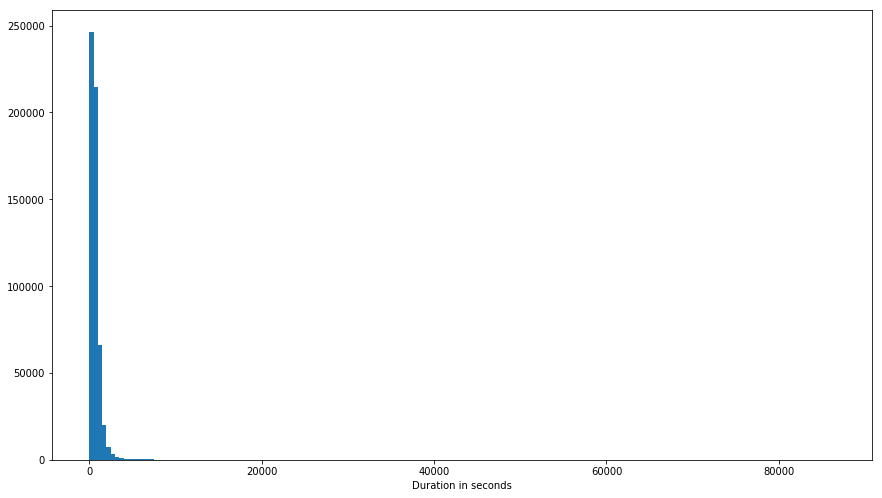

In [28]:
# start with a standard-scaled plot
binsize = 500
bins = np.arange(0, Three_months_df['Duration in Seconds'].max()+binsize, binsize)

plt.figure(figsize=[14.70, 8.27])
plt.hist(data = Three_months_df, x = 'Duration in Seconds', bins = bins)
plt.xlabel('Duration in seconds')
plt.show();

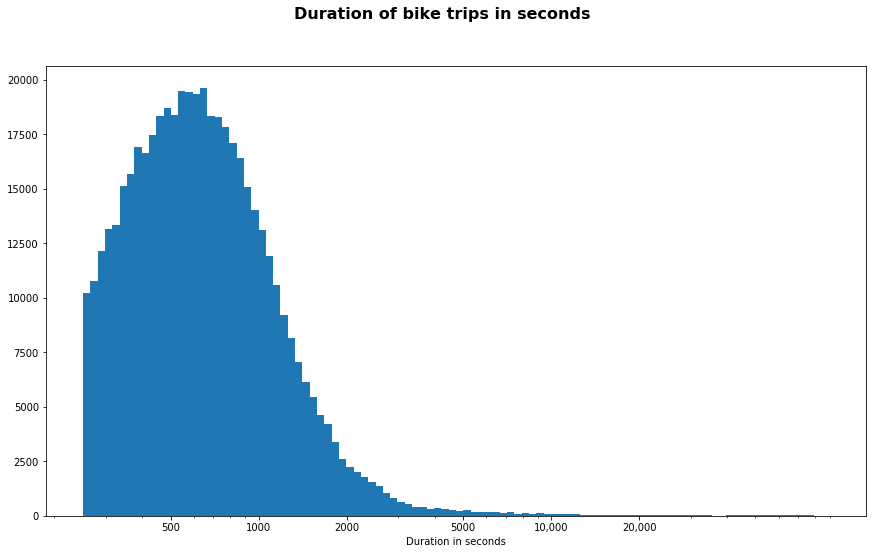

In [29]:
# we will put it on a log scale 
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(Three_months_df['Duration in Seconds'].max())+log_binsize, log_binsize)

plt.figure(figsize=[14.70, 8.27])
plt.hist(data = Three_months_df, x = 'Duration in Seconds', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1000', '2000', '5000', '10,000', '20,000'])
plt.xlabel('Duration in seconds')
plt.suptitle('Duration of bike trips in seconds', fontsize=16, fontweight="bold")
plt.show();

### The maximum duration is almost 16 minutes (1000 seconds)

### Now I want to explore the age of the members

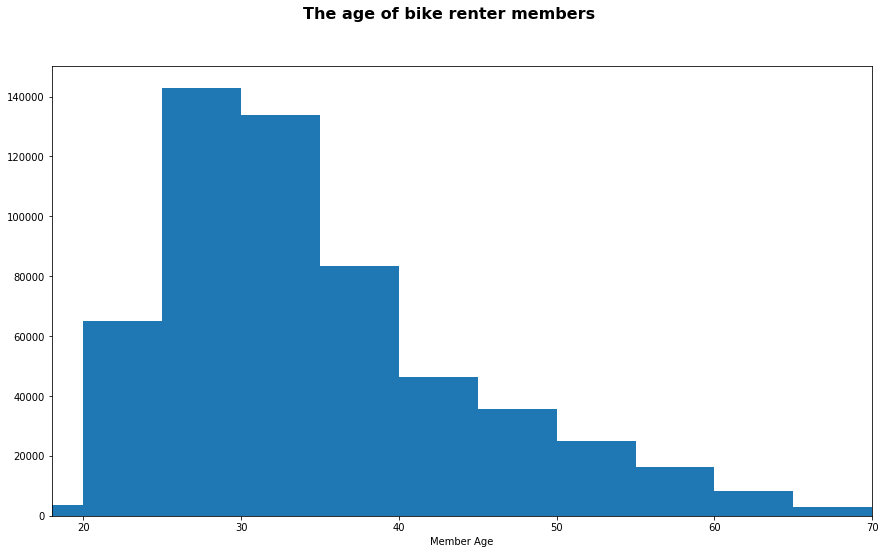

In [30]:
# plotting start_month on a standard scale
binsize = 5
bins = np.arange(0, Three_months_df['member_age'].max()+binsize, binsize)

plt.figure(figsize=[14.70, 8.27])
plt.hist(data = Three_months_df, x = 'member_age', bins = bins)
plt.xlim([18,70])
plt.xlabel('Member Age')
plt.suptitle('The age of bike renter members', fontsize=16, fontweight="bold")

plt.show();

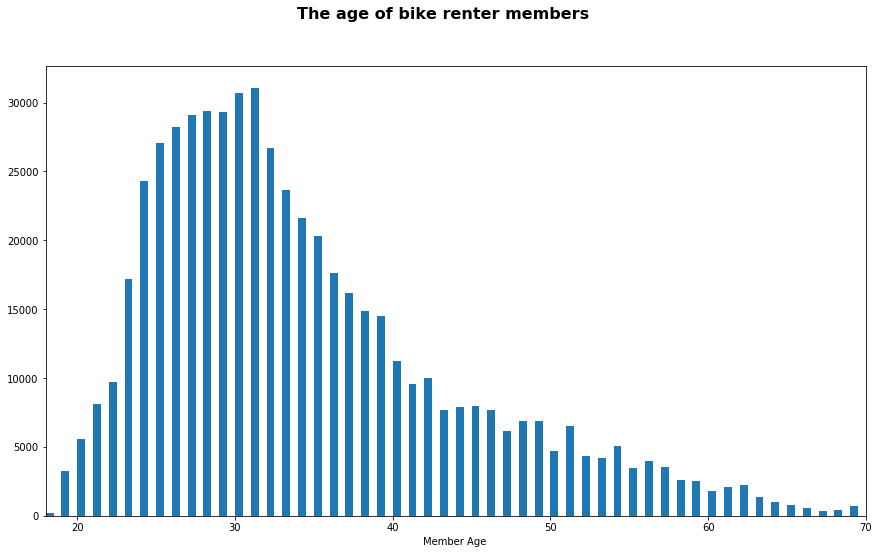

In [31]:
# investigating further on an even smaller bin size
binsize = 0.5
bins = np.arange(0, Three_months_df['member_age'].max()+binsize, binsize)

plt.figure(figsize=[14.70, 8.27])
plt.hist(data = Three_months_df, x = 'member_age', bins = bins)
plt.xlim([18,70])
plt.xlabel('Member Age ')
plt.suptitle('The age of bike renter members', fontsize=16, fontweight="bold")

plt.show();

 ### Member age above 60 years old is getting fewer. I will remove those recors.

In [32]:
Three_months_df = Three_months_df.query('member_age <= 60' )

### Now plotting again without the above 60 years old members.

<Figure size 1058.4x595.44 with 0 Axes>

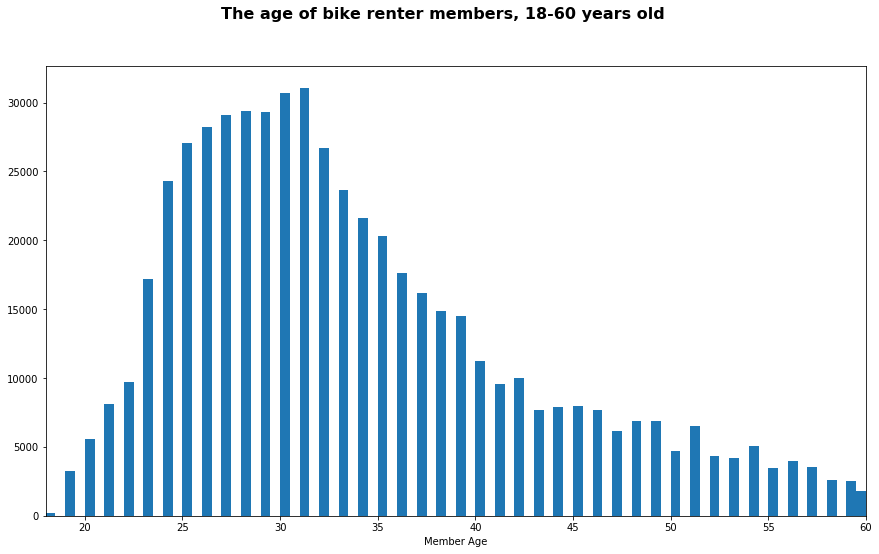

In [33]:
plt.figure(figsize=[14.70, 8.27])
binsize = 0.5
bins = np.arange(0, Three_months_df['member_age'].max()+binsize, binsize)

plt.figure(figsize=[14.70, 8.27])
plt.hist(data = Three_months_df, x = 'member_age', bins = bins)
plt.xlim([18,60])
plt.xlabel('Member Age')
plt.suptitle('The age of bike renter members, 18-60 years old', fontsize=16, fontweight="bold")

plt.show();

### It is clearly that most of the members are around the age 30 years old. To be precise, 32.

### I'll now move on to the other variables in the dataset: member_gender and user_type.

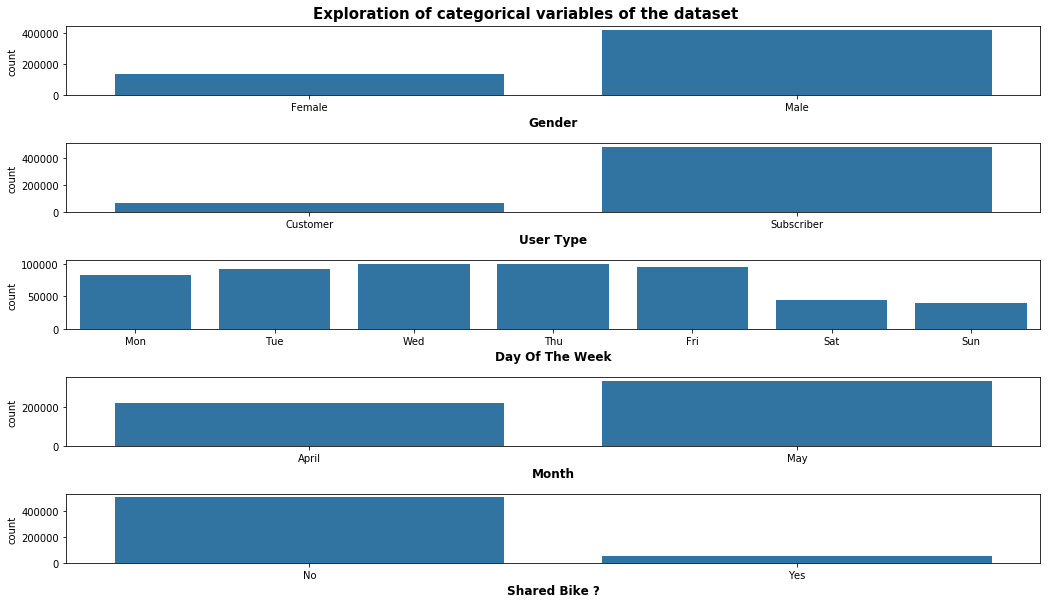

In [34]:
# let's plot the 2 variables together to get an idea of each ordinal variable's distribution.

fig, ax = plt.subplots(nrows=5, figsize=[14.70, 8.27])

default_color = sb.color_palette()[0]
sb.countplot(data = Three_months_df, x = 'member_gender', color = default_color, ax = ax[0])
ax[0].set_xlabel('Gender'.title(), fontsize = 12, weight = "bold")

sb.countplot(data = Three_months_df, x = 'user_type', color = default_color, ax = ax[1])
ax[1].set_xlabel('User Type'.title(), fontsize = 12, weight = "bold")

sb.countplot(data = Three_months_df, x = 'start_time_weekday', color = default_color, ax = ax[2])
ax[2].set_xlabel('Day of the week'.title(), fontsize = 12, weight = "bold")


sb.countplot(data = Three_months_df, x = 'start_month', color = default_color, ax = ax[3])
ax[3].set_xlabel('Month'.title(), fontsize = 12, weight = "bold")


sb.countplot(data = Three_months_df, x = 'bike_share_for_all_trip', color = default_color, ax = ax[4])
ax[4].set_xlabel('Shared bike ?'.title(), fontsize = 12, weight = "bold")


plt.suptitle('Exploration of categorical variables of the dataset', fontsize=15, fontweight="bold", y = 1.01)
plt.tight_layout()


plt.show();

##  That shows that are male users are more than the females, as well as the subscribers number is way higher than the customer user_type. Moreover, interstingly, Thursday is the peak day among all weekdays. Also, May has more bike renters than April, that maybe due to the weather getting better. Also, most of the trips were not shared.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

### The duration_sec variable took on a large range of values, so I looked at the data using a log transform. Under the transformation, the data looked bimodal, with one peak between 500 and 1000.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

### The member_age variable has ouliers, due to the nature of the dataset, the age above 60 are getting less in number. For saftey, those records were omitted.

## Bivariate Exploration

### To start off with, I want to look at the pairwise correlations present between features in the data.


In [35]:
numeric_vars = ['Duration in Seconds', 'member_age', 'start_time_month','start_time_day', 'start_time_hour']
categoric_vars = ['member_gender', 'user_type', 'start_time_weekday', 'start_month', 'bike_share_for_all_trip']

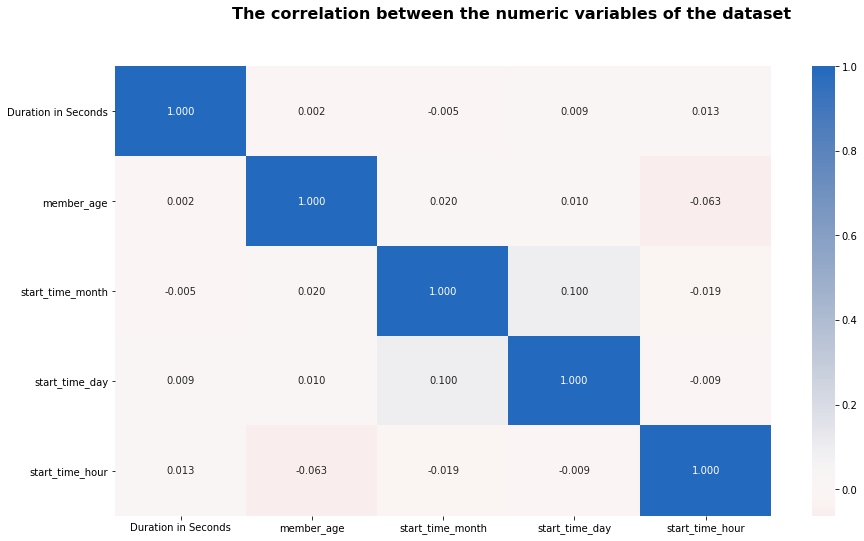

In [36]:
# correlation plot
plt.figure(figsize=[14.70, 8.27])

sb.heatmap(Three_months_df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.suptitle('The correlation between the numeric variables of the dataset', fontsize=16, fontweight="bold")
plt.show();

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<Figure size 1058.4x595.44 with 0 Axes>

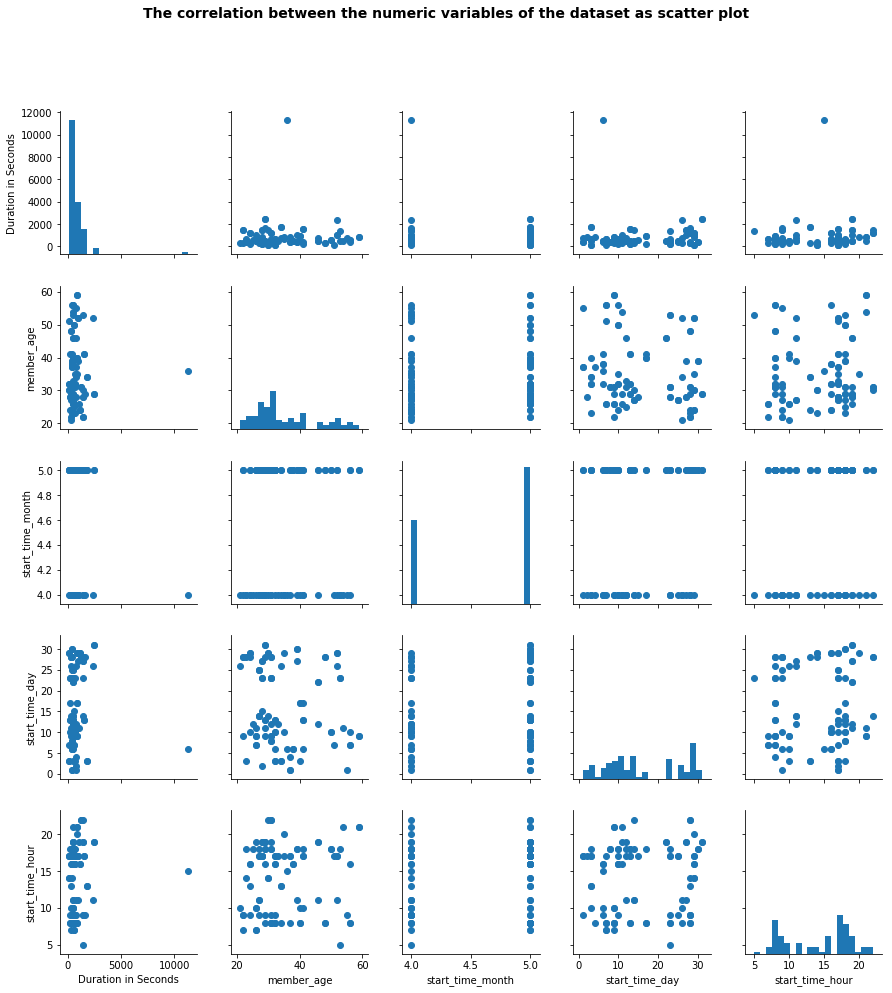

In [37]:
# plot matrix: sample 100 records so that plots are clearer and
# they render faster
plt.figure(figsize=[14.70, 8.27])
samples = np.random.choice(Three_months_df.shape[0], 100, replace = False)
trip_samp = Three_months_df.loc[samples,:]

graph = sb.PairGrid(data = trip_samp, vars = numeric_vars)
graph = graph.map_diag(plt.hist, bins = 20);
graph.map_offdiag(plt.scatter)
plt.tight_layout()
graph.fig.suptitle('The correlation between the numeric variables of the dataset as scatter plot', y = 1.1, fontsize=14, fontweight='semibold');


### There is a moderate positive correlation between duration of the trip and the member age.
### Also, there is a correlatopn between the trip start_time day and the trip start_time month.

#### Let's move on to looking at how member age and duration of trip in seconds correlate with the categorical variables.

<Figure size 1058.4x595.44 with 0 Axes>

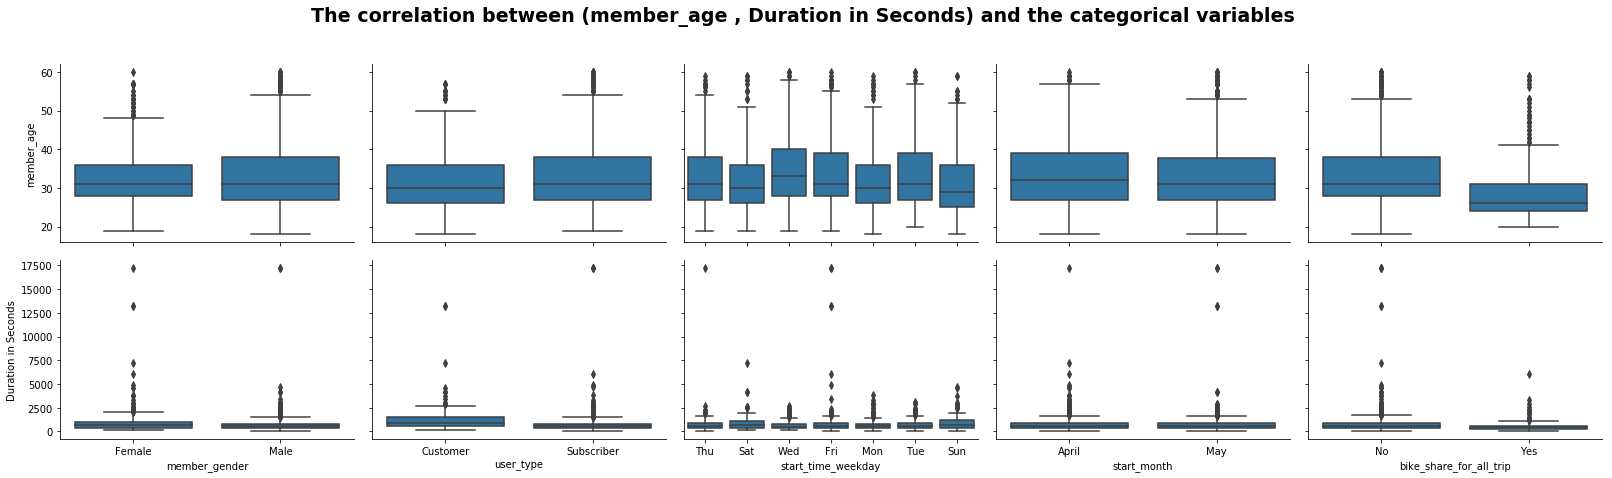

In [38]:
# plot matrix of numeric features against categorical features.
plt.figure(figsize=[14.70, 8.27])
samples = np.random.choice(Three_months_df.shape[0], 2000, replace = False)
trip_samp = Three_months_df.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)


graph = sb.PairGrid(data = trip_samp, y_vars = ['member_age', 'Duration in Seconds'], x_vars = categoric_vars,
                height = 3, aspect = 1.5)

graph.map(boxgrid)

graph.fig.suptitle('The correlation between (member_age , Duration in Seconds) and the categorical variables ', y = 1.1, fontsize=19, fontweight='semibold');
plt.tight_layout()

plt.show();

### Interestingly, it appears that there are some relationships between the categorical variables and the age of the member. The median of male age is a little higher than the median of the female age. Also, on Saturdays and Sundays, the age of the bike renters is higher than the other days.

#### Finally, let's look at relationships between the following categorical features; member_gender, user_type, start_time_weekday

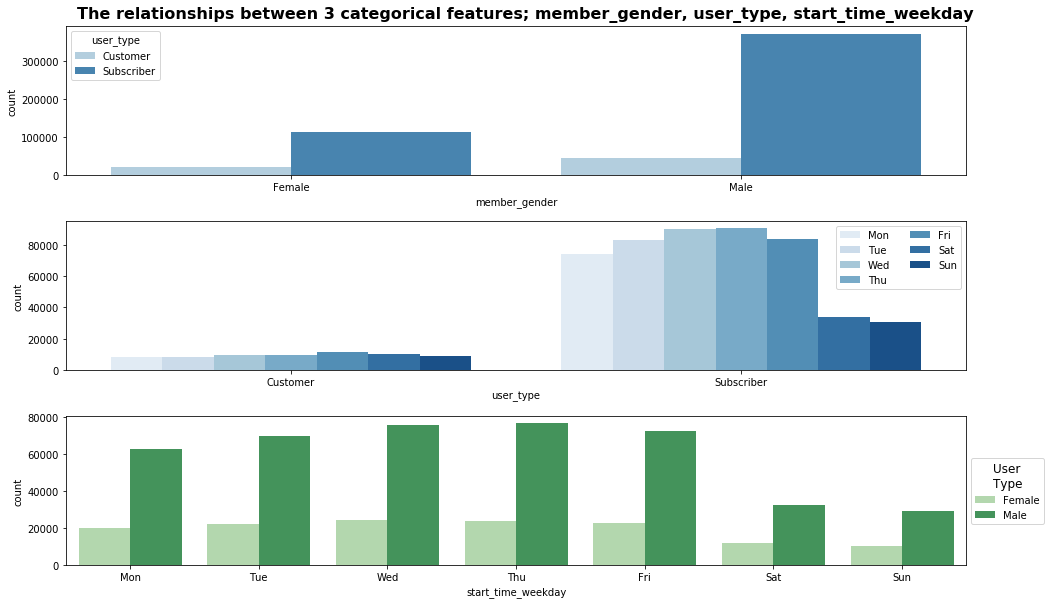

In [39]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize=[14.70, 8.27])

# subplot 1: member_gender vs user_type

plt.subplot(3, 1, 1)
sb.countplot(data = Three_months_df, x = 'member_gender', hue = 'user_type', palette = 'Blues')

# subplot 2: user_type vs. start_time_weekday
ax = plt.subplot(3, 1, 2)

sb.countplot(data = Three_months_df, x = 'user_type', hue = 'start_time_weekday', palette = 'Blues')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: start_time_weekday vs. member_gender, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = Three_months_df, x = 'start_time_weekday', hue = 'member_gender', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

plt.suptitle('The relationships between 3 categorical features; member_gender, user_type, start_time_weekday', y=1.01, fontsize=16, fontweight="bold")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
           title="User\nType", title_fontsize = 12);
plt.tight_layout()
plt.show();

### From that we can interpret; Fridays get more customer user type than the other days, while Wednesdays and Thursdays are mpre poplar among the subscribers. The weekends ( Saturdays and Sundays) have the least number of bike renters.



### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

### The weekends have the least number of bike renting among other days of the week. In the other hand, on weekends the bike renters are older than other days of the week.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

###  As the age of the member gets older, the duration of the trip gets longer.

## Multivariate Exploration

### The main thing I want to explore in this part of the analysis is how the following categorical variables; ( member_gender, user_type, day of the week)  play into the relationship between trip duration and age of the member.

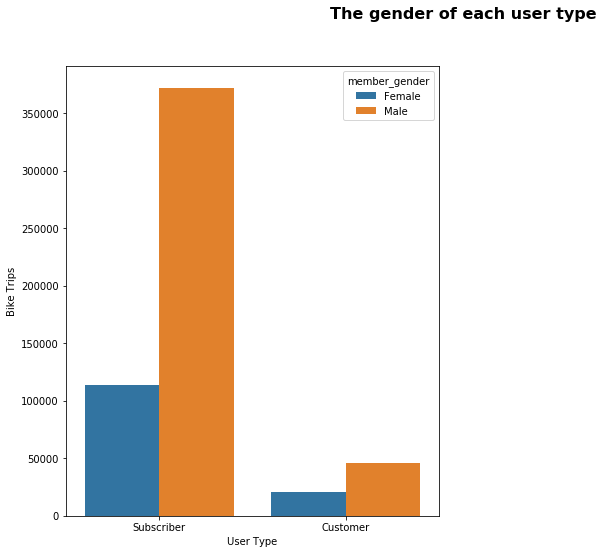

In [40]:
plt.figure(figsize=[14.70, 8.27])
plt.subplot(1, 2, 1)

gragh = sb.countplot(data = Three_months_df, x = "user_type", hue = "member_gender", order = Three_months_df.user_type.value_counts().index)
gragh.set_xlabel('User Type')
plt.suptitle('The gender of each user type', fontsize=16, fontweight="bold")


gragh.set_ylabel('Bike Trips');

### Generally, male useres are more than the female users.

### Next, I will explore how the gender of the user and the type of the user relate to the month that they have rent the bike.

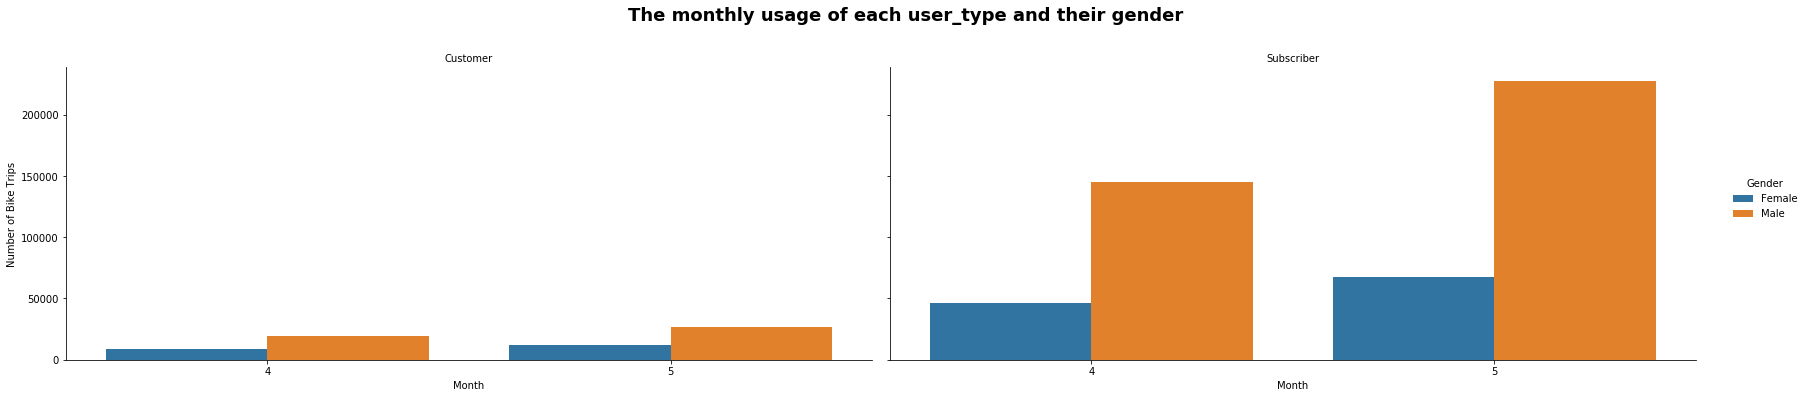

In [41]:
gragh = sb.catplot(data = Three_months_df, x = 'start_time_month', col = "user_type", hue = "member_gender", kind = 'count', aspect = (14.70/3)/(8.27/4))
gragh.set_axis_labels("Month", "Number of Bike Trips")
gragh._legend.set_title('Gender')

plt.suptitle('The monthly usage of each user_type and their gender', fontsize=18, fontweight="semibold", y = 1.1)

gragh.set_titles("{col_name}");


### Next, I will explore how the gender of the user and the type of the user relate to the day of the week that they have rent the bike.

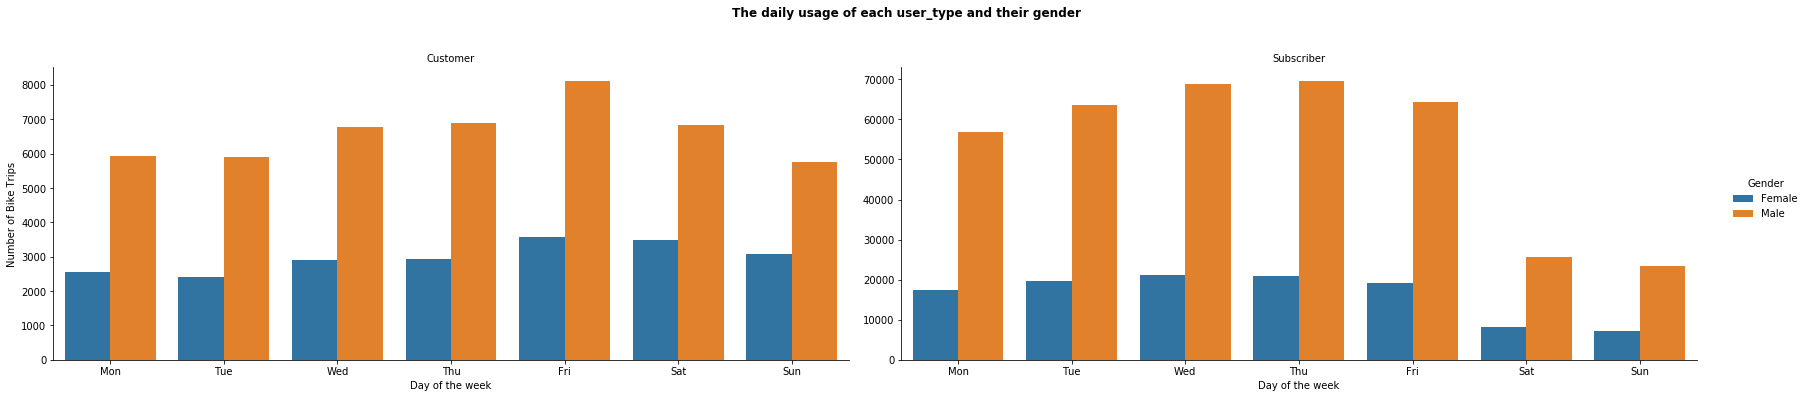

In [42]:
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

gragh = sb.catplot(data = Three_months_df, x = 'start_time_weekday', col = "user_type", hue = 'member_gender', kind = 'count', sharey = False,
                order = weekday, aspect = (14.70/3)/(8.27/4))
gragh.set_axis_labels("Day of the week", "Number of Bike Trips")
gragh._legend.set_title('Gender')
plt.suptitle('The daily usage of each user_type and their gender', fontsize=12, fontweight="semibold", y = 1.1)


gragh.set_titles("{col_name}");

### As noticed before, middle of the week are the days that more poplar among subscribers. As well as, the female customers are more than the female subscribers.

<Figure size 1058.4x595.44 with 0 Axes>

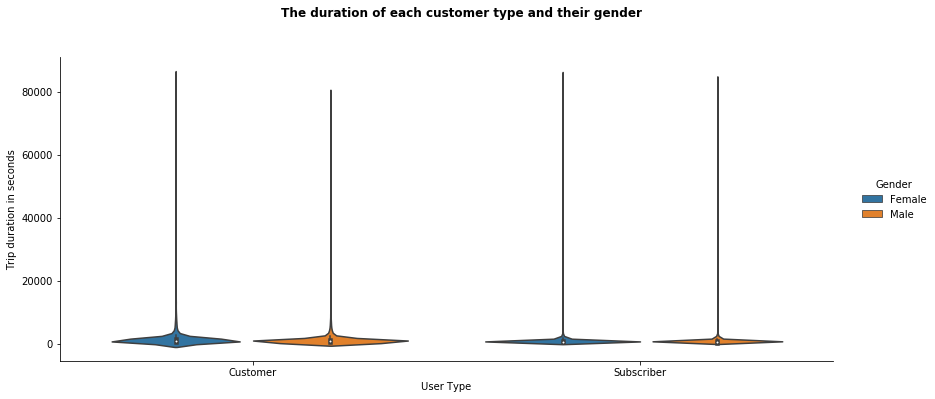

In [43]:
plt.figure(figsize=[14.70, 8.27])
graph = sb.catplot(data = Three_months_df, x = 'user_type', y = "Duration in Seconds", hue = "member_gender", kind = "violin", aspect = (14.70/3)/(8.27/4))

graph.set_axis_labels("User Type", "Trip duration in seconds")
graph._legend.set_title('Gender')
plt.suptitle('The duration of each customer type and their gender', fontsize=12, fontweight="semibold",y =1.1);



### We can notice that in both user types, females takes longer trips than males.

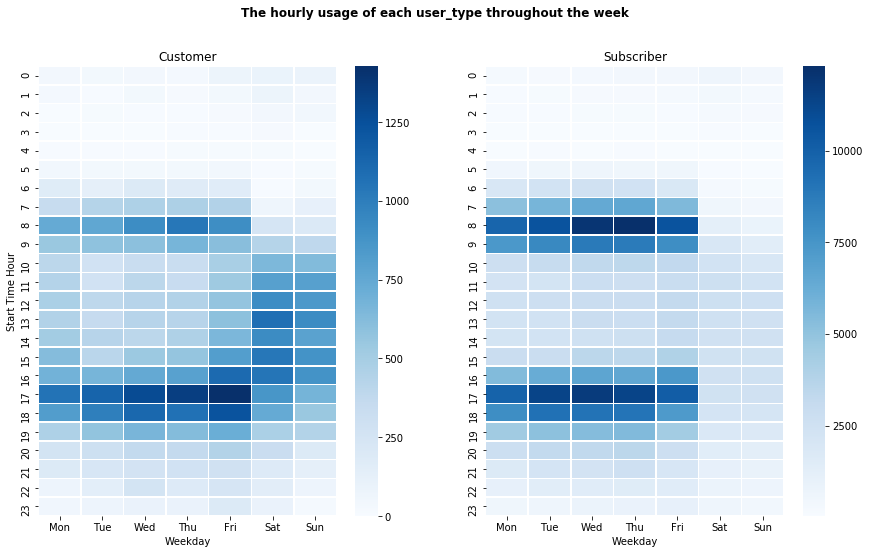

In [44]:
Three_months_df['start_time_weekday'] = pd.Categorical(Three_months_df['start_time_weekday'], 
                                                categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                                ordered=True)
plt.figure(figsize=[14.70, 8.27])

# creating heatmap for customers
plt.subplot(1, 2, 1)
df_customer = Three_months_df.query('user_type == "Customer"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_customer = df_customer.pivot("start_time_hour", "start_time_weekday", "bike_id")
sb.heatmap(df_customer, cmap="Blues",linewidths=.5 )

plt.title("Customer", y=1)
plt.xlabel('Weekday')
plt.ylabel('Start Time Hour')

# creating heatmap for subscribers
plt.subplot(1, 2, 2)
df_subscriber = Three_months_df.query('user_type == "Subscriber"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_subscriber = df_subscriber.pivot("start_time_hour", "start_time_weekday", "bike_id")
sb.heatmap(df_subscriber, cmap="Blues",linewidths=.5)

plt.title("Subscriber", y = 1)
plt.xlabel('Weekday')
plt.suptitle('The hourly usage of each user_type throughout the week', fontsize=12, fontweight="semibold")

plt.ylabel('');

 ### We may notice now that among subscribers, between 7-9AM and 5-6pm are the most poplar hours. From that we may derive that most of the subscribers are employees.

### While costomers, have peek in the evenings (5-7 pm). Those maybe just casual renters and want to cruise the city after working hours.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

### Male users are more than female users, as well as that the middle days of the week are more popular than the weekends.

### Were there any interesting or surprising interactions between features?

### Female customers are more than female suscribers. Also, Females take longer trips than males.

 ### Finally, I have notice  that among subscribers, 7-9AM and 5-6pm are the most poplar hours. From that we may derive that most of the subscribers are employees.

### While customers, have peek in the evenings (5-7 pm). Those maybe just casual renters and want to cruise the city after working hours